<a href="https://colab.research.google.com/github/Ludmi0611/Analisis-CMM/blob/main/c24002_Grupo_227_TP_P2_Anal%C3%ADtica_auditor%C3%ADa_CMM_Paraguay_Jun_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://drive.google.com/uc?id=1g8LYJGAetHiJVwl8IbLjWcMlYAFvmh4q" width="200">
<h1><strong>Análisis de las operaciones de CMM en Paraguay</strong></h1>
<hr style="margin-bottom: 40px;">


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se importa el archivo de Google Sheets con todos los csv.

In [ ]:
id_planilla = '1xFIi_2nBFeRJDuFUuxGFRdPC5-HwTs5xoGGeY1RHDmE'
URL = f'https://docs.google.com/spreadsheets/d/{id_planilla}/gviz/tq?tqx=out:csv&sheet='

df_distributors = pd.read_csv(URL + 'distributors_profiles')
df_exports = pd.read_csv(URL + 'exports_to_Paraguay', dtype={'distributor': str})
df_sales = pd.read_csv(URL + 'sales_in_Paraguay')
location_profiles = pd.read_csv(URL + 'locations_profiles')

#**Exploración y limpieza de datos de exportaciones**
Utilizando el método .info() se ven los tipos de datos en el dataframe, las columnas y la cantidad de valores no nulos.

In [ ]:
df_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   distributor  46 non-null     object 
 1   Rubber       46 non-null     object 
 2   Brass        46 non-null     object 
 3   Vinyl        46 non-null     object 
 4   Granite      46 non-null     object 
 5   Stone        46 non-null     object 
 6   Brick        46 non-null     object 
 7   Aluminum     46 non-null     object 
 8   Glass        46 non-null     object 
 9   Plexiglass   46 non-null     object 
 10  Steel        46 non-null     object 
 11  Wood         46 non-null     object 
 12  Plastic      46 non-null     object 
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  1 non-null      object 
 15  Columnas     1 non-null      object 
dtypes: float64(1), object(15)
memory usage: 5.9+ KB


Como se puede observar, en la columna de distributor y en la de los productos todas tienen 46 valores no nulos, por lo que de momento no se observa que hayan filas con faltante de datos.
También se observa que hay columnas que se toman como "Unnamed: 13" y "Unnamed: 14", y "Columnas"

In [ ]:
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


Se puede ver que las columnas "Unnamed: 13", "Unnamed: 14", y "Columnas" tienen valores NaN, y no nos sirven para nuestro análisis. Por lo que se procede a eliminarlas utilizando dropna con el parametro how='any', lo que hace que se elimine toda la columna que contenga **al menos un** NaN.


In [ ]:
df_exports = df_exports.dropna(axis = 1, how='any')
df_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  46 non-null     object
 1   Rubber       46 non-null     object
 2   Brass        46 non-null     object
 3   Vinyl        46 non-null     object
 4   Granite      46 non-null     object
 5   Stone        46 non-null     object
 6   Brick        46 non-null     object
 7   Aluminum     46 non-null     object
 8   Glass        46 non-null     object
 9   Plexiglass   46 non-null     object
 10  Steel        46 non-null     object
 11  Wood         46 non-null     object
 12  Plastic      46 non-null     object
dtypes: object(13)
memory usage: 4.8+ KB


Las columnas innecesarias fueron eliminadas correctamente

###**Búsqueda de datos duplicados:**
El siguiente paso en la limpieza de los datos de las exportaciones es verificar si existen valores que estén duplicados, y en caso de existir duplicados, identificarlos y eliminarlos.

In [ ]:
df_exports.duplicated().sum()

2

Utilizando .duplicated() y .sum(), se obtiene la cantidad de datos duplicados. Como se observa, son 2 duplicados.

**Se procede a identificar cuales son los valores duplicados,** el siguiente código muestra el valor original el duplicado:

In [ ]:
df_exports[df_exports.duplicated(keep=False)]

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
11,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"
13,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
19,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
41,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"


Se procede a eliminar los duplicados, para comprobar que se elimina la cantidad correcta. Se muestra la cantidad de registros antes y después de eliminar los duplicados

In [ ]:
print(len(df_exports))
df_exports = df_exports.drop_duplicates()
print(len(df_exports))

46
44


Se eliminaron correctamente 2 registros duplicados.

###**Limpieza y tipos de datos**
Continuando con la limpieza, se procede a convertir los datos al formato y tipo de dato adecuado

In [ ]:
df_exports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 45
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  44 non-null     object
 1   Rubber       44 non-null     object
 2   Brass        44 non-null     object
 3   Vinyl        44 non-null     object
 4   Granite      44 non-null     object
 5   Stone        44 non-null     object
 6   Brick        44 non-null     object
 7   Aluminum     44 non-null     object
 8   Glass        44 non-null     object
 9   Plexiglass   44 non-null     object
 10  Steel        44 non-null     object
 11  Wood         44 non-null     object
 12  Plastic      44 non-null     object
dtypes: object(13)
memory usage: 4.8+ KB


In [ ]:
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


Se observa que todas las columnas son de tipo Object, por lo que son strings. Además las columnas de los productos tienen el símbolo de moneda "$", puntos "." en la parte de los miles y coma "," en la parte decimal. Se procede a eliminar el símbolo de moneda, eliminar los puntos, y reemplazar la coma por punto.

In [ ]:
cols = list(df_exports.columns)
for col in cols:
  df_exports[col] = df_exports[col].str.replace("$", "")
  df_exports[col] = df_exports[col].str.replace(".", "")
  df_exports[col] = df_exports[col].str.replace(",", ".")

In [ ]:
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.00,36031577.00,31118167.00,21322223.00,35382848.00,35280292.00,32362235.00,36836190.00,9440858902.00,34676425.00,31862742.00,32588556.00
1,1553,27566922.00,21996538.00,39412316.00,25681987.00,41861783.00,22408742.00,40690302.00,37958885.00,8726744768.00,26472020.00,27403955.00,37881851.00
2,1666,37577095.00,41457655.00,31467967.00,37577926.00,35845106.00,42953168.00,33817289.00,41602183.00,1223232055.00,30599951.00,40514747.00,38569219.00
3,364,36012730.00,41667692.00,22837073.00,29288200.00,39553494.00,33513588.00,36827718.00,29669764.00,44858747.00,26820925.00,20797348.00,21064408.00
4,920,43416417.00,36290780.00,23679738.00,21183706.00,25210622.00,30864041.00,41173207.00,36719169.00,43893114.00,22575455.00,21351499.00,24607204.00


El proceso de eliminación del símbolo de moneda, la eliminación de puntos, y el reemplazo de comas por puntos fue realizado correctamente.

**Se procede a cambiar el tipo de dato de las columnas de los productos de str a float.**

In [ ]:
cols = list(df_exports.columns[1:])
for col in cols:
  df_exports[col] = df_exports[col].astype(float)

In [ ]:
df_exports.dtypes

distributor     object
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

In [ ]:
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0
3,364,36012730.0,41667692.0,22837073.0,29288200.0,39553494.0,33513588.0,36827718.0,29669764.0,4.485875e+07,26820925.0,20797348.0,21064408.0
4,920,43416417.0,36290780.0,23679738.0,21183706.0,25210622.0,30864041.0,41173207.0,36719169.0,4.389311e+07,22575455.0,21351499.0,24607204.0


Se observa que algunos valores de los productos quedan con un formato científico lo cual dificulta la lectura. Se procede a agregar un formato que permita que estos valores sean más fáciles de leer.

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"22,431,099.00","36,031,577.00","31,118,167.00","21,322,223.00","35,382,848.00","35,280,292.00","32,362,235.00","36,836,190.00","9,440,858,902.00","34,676,425.00","31,862,742.00","32,588,556.00"
1,1553,"27,566,922.00","21,996,538.00","39,412,316.00","25,681,987.00","41,861,783.00","22,408,742.00","40,690,302.00","37,958,885.00","8,726,744,768.00","26,472,020.00","27,403,955.00","37,881,851.00"
2,1666,"37,577,095.00","41,457,655.00","31,467,967.00","37,577,926.00","35,845,106.00","42,953,168.00","33,817,289.00","41,602,183.00","1,223,232,055.00","30,599,951.00","40,514,747.00","38,569,219.00"
3,364,"36,012,730.00","41,667,692.00","22,837,073.00","29,288,200.00","39,553,494.00","33,513,588.00","36,827,718.00","29,669,764.00","44,858,747.00","26,820,925.00","20,797,348.00","21,064,408.00"
4,920,"43,416,417.00","36,290,780.00","23,679,738.00","21,183,706.00","25,210,622.00","30,864,041.00","41,173,207.00","36,719,169.00","43,893,114.00","22,575,455.00","21,351,499.00","24,607,204.00"


#**Análisis de los valores de productos exportados**

Empezamos por obtener un resumen estadístico de las exportaciones:

In [ ]:
df_exports.describe()

,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,"33,296,420.05","31,691,793.75","31,728,419.39","30,390,226.45","33,512,974.75","119,557,932.02","34,390,218.86","32,495,153.75","472,255,284.89","310,293,864.23","32,026,626.75","33,094,177.14"
std,"7,292,618.57","7,868,101.75","5,806,897.43","7,851,079.25","7,317,395.01","302,307,924.37","6,551,059.72","6,849,606.29","1,910,909,728.31","1,840,670,976.33","7,837,083.33","7,409,087.02"
min,"20,607,246.00","20,737,841.00","20,935,764.00","20,871,609.00","21,683,294.00","20,840,169.00","21,443,932.00","21,113,491.00","21,395,275.00","21,114,989.00","20,797,348.00","20,684,792.00"
25%,"28,051,209.50","23,725,491.25","27,362,197.00","23,233,564.25","27,187,189.25","28,606,811.25","29,988,102.00","27,156,975.50","30,085,566.50","26,748,319.00","24,132,952.00","26,481,899.25"
50%,"34,446,810.00","29,940,461.50","32,015,562.50","28,799,755.00","32,615,581.50","34,423,280.50","34,086,807.50","31,690,785.00","35,126,374.00","32,093,718.00","32,480,919.00","33,213,202.50"
75%,"38,624,540.50","38,970,423.25","36,136,796.25","37,509,911.00","39,426,201.00","42,827,796.50","40,676,401.50","37,188,295.25","38,996,019.25","38,412,135.75","39,637,173.75","38,725,399.75"
max,"44,229,593.00","44,568,676.00","42,055,834.00","45,198,396.00","45,128,426.00","1,643,078,851.00","44,733,537.00","44,676,489.00","9,440,858,902.00","12,242,337,842.00","44,049,215.00","44,234,252.00"


Se observa que en productos como ladrillo (brick), plexiglass, y acero(steel), la media varía mucho de la mediana y la desviación estandard es muy grande. Por lo que podemos decir que en esos productos existen valores muy grandes.

In [ ]:
df_exports['Brick'].describe()

count              44.00
mean      119,557,932.02
std       302,307,924.37
min        20,840,169.00
25%        28,606,811.25
50%        34,423,280.50
75%        42,827,796.50
max     1,643,078,851.00
Name: Brick, dtype: float64

Text(0.5, 1.0, 'Exportación de Ladrillos')

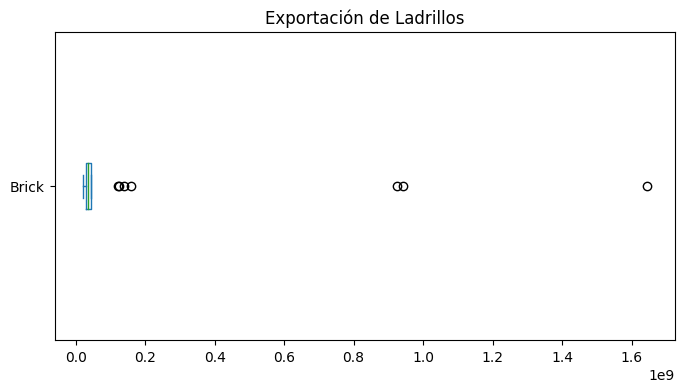

In [ ]:
df_exports['Brick'].plot(kind='box', vert=False, figsize=(8,4)).set_title('Exportación de Ladrillos')

In [ ]:
df_exports['Plexiglass'].describe()

count              44.00
mean      472,255,284.89
std     1,910,909,728.31
min        21,395,275.00
25%        30,085,566.50
50%        35,126,374.00
75%        38,996,019.25
max     9,440,858,902.00
Name: Plexiglass, dtype: float64

Text(0.5, 1.0, 'Exportación de Plexiglass')

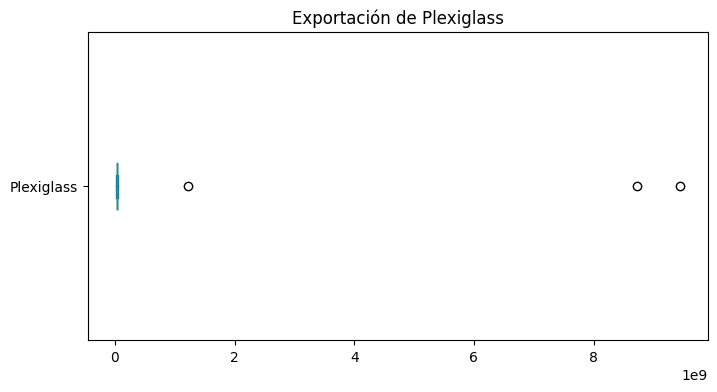

In [ ]:
df_exports['Plexiglass'].plot(kind='box', vert=False, figsize=(8,4)).set_title('Exportación de Plexiglass')

In [ ]:
df_exports['Steel'].describe()

count               44.00
mean       310,293,864.23
std      1,840,670,976.33
min         21,114,989.00
25%         26,748,319.00
50%         32,093,718.00
75%         38,412,135.75
max     12,242,337,842.00
Name: Steel, dtype: float64

En todos estos casos se observan valores máximos exageradamente grandes.
**Podemos visualizar esto mediante un gráfico de caja y bigotes:**

Text(0.5, 1.0, 'Exportación de Acero')

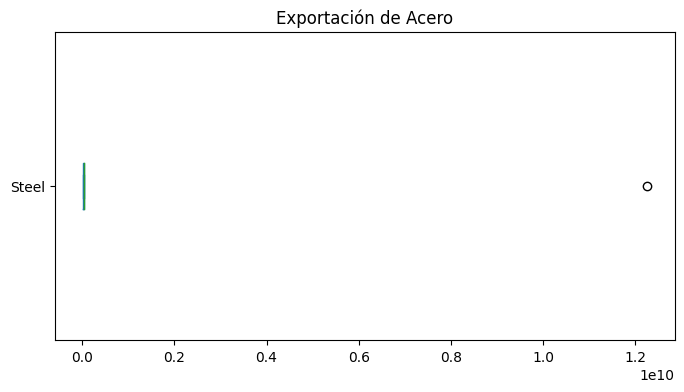

In [ ]:
df_exports['Steel'].plot(kind='box', vert=False, figsize=(8,4)).set_title('Exportación de Acero')

En todos estos productos mencionados se ven varios valores que se consideran outliers
Podemos comparar estos productos con otros que poseen valores más normales, por ejemplo el producto Piedra (stone)

In [ ]:
df_exports['Stone'].describe()

count           44.00
mean    33,512,974.75
std      7,317,395.01
min     21,683,294.00
25%     27,187,189.25
50%     32,615,581.50
75%     39,426,201.00
max     45,128,426.00
Name: Stone, dtype: float64

Text(0.5, 1.0, 'Exportación de Piedra')

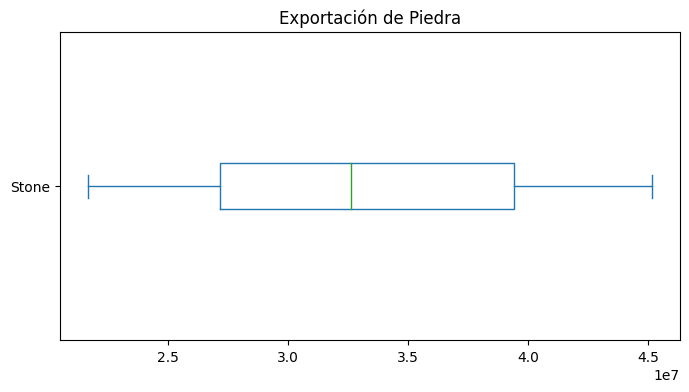

In [ ]:
df_exports['Stone'].plot(kind='box', vert=False, figsize=(8,4)).set_title('Exportación de Piedra')

#**Exploración y limpieza de datos de Ventas**
Se realiza la limpieza del dataframe de ventas utilizando los mismos métodos que en el de exportaciones.

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   distributor  44 non-null     float64
 1   Rubber       45 non-null     object 
 2   Brass        45 non-null     object 
 3   Vinyl        45 non-null     object 
 4   Granite      45 non-null     object 
 5   Stone        45 non-null     object 
 6   Brick        45 non-null     object 
 7   Aluminum     45 non-null     object 
 8   Glass        45 non-null     object 
 9   Plexiglass   45 non-null     object 
 10  Steel        45 non-null     object 
 11  Wood         45 non-null     object 
 12  Plastic      45 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.7+ KB


Se observa que en la columna distributor hay un valor nulo

In [ ]:
df_sales[df_sales['distributor'].isnull()]

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


In [ ]:
df_sales.tail()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
40,808.00,"$3.221.765,13","$10.536.882,23","$35.563.624,11","$46.039.695,30","$22.300.838,58","$0,00","$51.579.748,25","$59.199.680,31","$12.466.621,84","$80,31","$36.999.867,09","$112.927.599,01"
41,325.00,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,"1,169.00","$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29.00,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


Observamos que es la última fila, que tiene los totales de todas las ventas por producto. Para facilitar la tarea de análisis y limpieza la quitamos

In [ ]:
df_sales = df_sales.drop(df_sales.index[-1])
df_sales.tail()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
39,715.00,"$9.945.371,16","$41.572.788,80","$6.662.942,92","$1.473.437,08","$55.020.982,80","$0,00","$61.236.075,66","$43.512.922,94","$1.033.102.840,61","$0,00","$21.883.374,92","$100.443.998,86"
40,808.00,"$3.221.765,13","$10.536.882,23","$35.563.624,11","$46.039.695,30","$22.300.838,58","$0,00","$51.579.748,25","$59.199.680,31","$12.466.621,84","$80,31","$36.999.867,09","$112.927.599,01"
41,325.00,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,"1,169.00","$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29.00,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   distributor  44 non-null     float64
 1   Rubber       44 non-null     object 
 2   Brass        44 non-null     object 
 3   Vinyl        44 non-null     object 
 4   Granite      44 non-null     object 
 5   Stone        44 non-null     object 
 6   Brick        44 non-null     object 
 7   Aluminum     44 non-null     object 
 8   Glass        44 non-null     object 
 9   Plexiglass   44 non-null     object 
 10  Steel        44 non-null     object 
 11  Wood         44 non-null     object 
 12  Plastic      44 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.6+ KB


Ya todas las columnas tienen valores no nulos por igual.

###Busqueda de duplicados en datos de ventas:

In [ ]:
df_sales.duplicated().sum()

0

No se encontraron duplicados.

###**Limpieza y transformación al tipo a los correctos tipos de datos**

In [ ]:
df_sales.dtypes

distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

In [ ]:
df_sales.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.00,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,"1,104.00","$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,"1,384.00","$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379.00,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,"1,599.00","$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


Al igual que los datos de las exportaciones, ventas posee todos los productos como object, es decir son strings. También Poseen símbolo de moneda, puntos para la parte de los miles y comas para la parte decimal. Se realiza el proceso para reemplazarlos

En el caso de los datos de las ventas, solamente poseía puntos a diferencia con el csv de las exportaciones que poseía puntos y comas. Por lo que simplemente podemos pasar los distribuidores al tipo entero

In [ ]:
df_sales['distributor'] = df_sales['distributor'].astype(int)

Luego se cambia el formato a las columnas de productos como se realizó anteriormente con las exportaciones

In [ ]:
cols_sales = list(df_sales.columns[1:])
for col in cols_sales:
  df_sales[col] = df_sales[col].str.replace("$", "")
  df_sales[col] = df_sales[col].str.replace(".", "")
  df_sales[col] = df_sales[col].str.replace(",", ".")

In [ ]:
df_sales.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.00,55872547.77,18050385.12,178927599.01,2788.80,54510203.61,20982.80
1,1104,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.00,46239695.30,33102840.61,35563624.11,599.01,9945371.16,187306.41
2,1384,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.00,21883374.92,78927599.01,1346769.34,0.00,36603264.50,300838.58
3,379,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.00,79358855.35,32067534.68,53172624.14,2922.94,33102840.61,579748.25
4,1599,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.00,53172624.14,57187306.41,1155872547.77,203.61,43512922.94,730734.07


Luego se convierten las columnas a float

In [ ]:
for col in cols_sales:
  df_sales[col] = df_sales[col].astype(float)

In [ ]:
df_sales.dtypes

distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

Podemos confirmar que se ha completado la limpieza de los datos de las ventas. Se procede a realizar el análisis.

##**Análisis de los valores de las ventas**

In [ ]:
#se ignora la columna de distribuidores
df_sales.iloc[:,1:].describe()

,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,"38,192,135.03","41,833,167.75","43,467,934.56","41,938,512.51","37,534,531.72","3,469.50","49,178,012.97","49,392,633.70","590,319,106.11","1,328.59","43,876,478.65","46,530,413.05"
std,"22,861,617.98","30,637,106.50","30,812,148.98","30,316,025.99","22,046,995.00","9,185.90","33,115,375.06","37,333,892.57","957,632,863.33","2,458.28","30,330,485.02","62,847,437.58"
min,"1,346,769.34","1,346,769.34","1,346,769.34","1,346,769.34","1,346,769.34",0.00,"6,706,393.21","1,586,769.34","1,346,769.34",0.00,"1,346,769.34","20,982.80"
25%,"21,421,137.39","21,421,137.39","21,857,576.34","21,857,576.34","21,421,137.39",0.00,"27,029,103.27","21,733,326.59","40,330,407.72",0.00,"21,857,576.34","9,427,595.12"
50%,"36,801,565.80","39,286,327.95","41,736,189.62","39,088,026.65","36,801,565.80",0.00,"42,962,159.58","42,962,159.58","136,731,561.59",192.10,"41,735,189.62","32,585,187.64"
75%,"55,233,874.04","56,156,888.89","57,054,260.79","55,233,874.04","54,637,898.41",0.00,"59,365,462.48","60,206,125.67","1,133,965,344.13",959.19,"57,054,260.79","54,850,789.65"
max,"90,185,311.22","177,874,267.01","177,874,267.01","177,874,267.01","90,185,311.22","42,458.00","177,874,267.01","177,874,267.01","5,441,399,590.44","11,121.98","177,874,267.01","325,185,311.22"


####**Con un resumen estadístico ya obtenemos datos que llaman la atención**


La media y la mediana en las ventas de Plexiglass varían mucho, y posee una desviación estandard muy alta.

In [ ]:
df_sales['Plexiglass'].describe()

count              44.00
mean      590,319,106.11
std       957,632,863.33
min         1,346,769.34
25%        40,330,407.72
50%       136,731,561.59
75%     1,133,965,344.13
max     5,441,399,590.44
Name: Plexiglass, dtype: float64

Lo podemos visualizar con un gráfico de caja y bigotes

Text(0.5, 1.0, 'Ventas de Plexiglass')

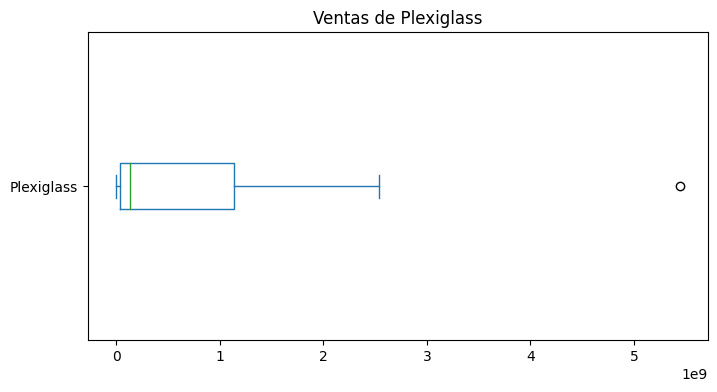

In [ ]:
df_sales['Plexiglass'].plot(kind='box', vert=False, figsize=(8,4)).set_title('Ventas de Plexiglass')

Se puede ver que hay un outlier.

In [ ]:
df_sales['Plexiglass'].max()

5441399590.44

**Otros datos que nos llaman la atención son las ventas de ladrillos(Brick) y de acero(Steel), las cuales tienen valores muy bajos y algunas incluso cero**

In [ ]:
df_sales['Brick'].describe()

count       44.00
mean     3,469.50
std      9,185.90
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     42,458.00
Name: Brick, dtype: float64

In [ ]:
df_sales['Steel'].describe()

count       44.00
mean     1,328.59
std      2,458.28
min          0.00
25%          0.00
50%        192.10
75%        959.19
max     11,121.98
Name: Steel, dtype: float64

**Si comparamos el promedio de ventas de ladrillos y acero con el promedio de exportaciones de dichos productos encontraremos una gran diferencia:**

####Promedio de ventas de Ladrillos y Acero:

In [ ]:
df_sales['Brick'].mean()

3469.5

In [ ]:
df_sales['Steel'].mean()

1328.5902272727274

####Promedio de exportaciones de Ladrillos y Acero

In [ ]:
df_exports['Brick'].mean()

119557932.02272727

In [ ]:
df_exports['Steel'].mean()

310293864.22727275

###**Para visualizar y obtener un análisis de esto, procedemos a crear dataframes de los totales de ventas por productos y exportaciones por productos:**

In [ ]:
exports_totals = df_exports.sum()
sales_totals = df_sales.sum()

In [ ]:
exports_totals

distributor    1526155316663649208602411753081183171032523411...
Rubber                                          1,465,042,482.00
Brass                                           1,394,438,925.00
Vinyl                                           1,396,050,453.00
Granite                                         1,337,169,964.00
Stone                                           1,474,570,889.00
Brick                                           5,260,549,009.00
Aluminum                                        1,513,169,630.00
Glass                                           1,429,786,765.00
Plexiglass                                     20,779,232,535.00
Steel                                          13,652,930,026.00
Wood                                            1,409,171,577.00
Plastic                                         1,456,143,794.00
dtype: object

distributor se ve asi porque se lo dejó como string en exports

In [ ]:
sales_totals

distributor           41,067.00
Rubber         1,680,453,941.29
Brass          1,840,659,380.95
Vinyl          1,912,589,120.56
Granite        1,845,294,550.27
Stone          1,651,519,395.63
Brick                152,658.00
Aluminum       2,163,832,570.85
Glass          2,173,275,882.75
Plexiglass    25,974,040,668.70
Steel                 58,457.97
Wood           1,930,565,060.44
Plastic        2,047,338,174.32
dtype: float64

Se procede a eliminar la columna de distributor

In [ ]:
exports_totals = exports_totals.drop('distributor')
sales_totals = sales_totals.drop('distributor')

In [ ]:
exports_totals = exports_totals.to_frame()
sales_totals = sales_totals.to_frame()

Se agregan títulos a la columna de totales

In [ ]:
exports_totals.columns = ['exports_total']
sales_totals.columns = ['sales_total']

####**Totales de exportaciones por producto**

In [ ]:
exports_totals

,exports_total
Rubber,"1,465,042,482.00"
Brass,"1,394,438,925.00"
Vinyl,"1,396,050,453.00"
Granite,"1,337,169,964.00"
Stone,"1,474,570,889.00"
Brick,"5,260,549,009.00"
Aluminum,"1,513,169,630.00"
Glass,"1,429,786,765.00"
Plexiglass,"20,779,232,535.00"
Steel,"13,652,930,026.00"


####**Totales de ventas por producto**

In [ ]:
sales_totals

,sales_total
Rubber,"1,680,453,941.29"
Brass,"1,840,659,380.95"
Vinyl,"1,912,589,120.56"
Granite,"1,845,294,550.27"
Stone,"1,651,519,395.63"
Brick,"152,658.00"
Aluminum,"2,163,832,570.85"
Glass,"2,173,275,882.75"
Plexiglass,"25,974,040,668.70"
Steel,"58,457.97"


##**Procedemos a unir los dataframes de totales de exportaciones y ventas, utilizando los productos como índice**

In [ ]:
exports_totals = exports_totals.reset_index()
sales_totals = sales_totals.reset_index()
exports_totals = exports_totals.rename(columns={'index': 'Products'})
sales_totals = sales_totals.rename(columns={'index': 'Products'})
exports_totals = exports_totals.set_index('Products')
sales_totals = sales_totals.set_index('Products')

In [ ]:
merged_totals = exports_totals.merge(sales_totals, how='inner', on='Products')
merged_totals

,exports_total,sales_total
Products,,
Rubber,"1,465,042,482.00","1,680,453,941.29"
Brass,"1,394,438,925.00","1,840,659,380.95"
Vinyl,"1,396,050,453.00","1,912,589,120.56"
Granite,"1,337,169,964.00","1,845,294,550.27"
Stone,"1,474,570,889.00","1,651,519,395.63"
Brick,"5,260,549,009.00","152,658.00"
Aluminum,"1,513,169,630.00","2,163,832,570.85"
Glass,"1,429,786,765.00","2,173,275,882.75"
Plexiglass,"20,779,232,535.00","25,974,040,668.70"


Ordenamos por el total de exportaciones.

In [ ]:
merged_totals = merged_totals.sort_values(by='exports_total', ascending=False)
merged_totals

,exports_total,sales_total
Products,,
Plexiglass,"20,779,232,535.00","25,974,040,668.70"
Steel,"13,652,930,026.00","58,457.97"
Brick,"5,260,549,009.00","152,658.00"
Aluminum,"1,513,169,630.00","2,163,832,570.85"
Stone,"1,474,570,889.00","1,651,519,395.63"
Rubber,"1,465,042,482.00","1,680,453,941.29"
Plastic,"1,456,143,794.00","2,047,338,174.32"
Glass,"1,429,786,765.00","2,173,275,882.75"
Wood,"1,409,171,577.00","1,930,565,060.44"


Viendo la union resultante de los totales de las exportaciones y las ventas, podemos notar la gran diferencia entre lo que se exportó en productos como ladrillos(Brick) y acero(Steel) y lo que se vendió.
Esto se puede apreciar mejor gráficamente, por lo que se realiza el gráfico de los totales. Estando las ventas representadas por barras, y las exportaciones por una línea.

[Text(0, 0, 'Plexiglass'),
 Text(1, 0, 'Steel'),
 Text(2, 0, 'Brick'),
 Text(3, 0, 'Aluminum'),
 Text(4, 0, 'Stone'),
 Text(5, 0, 'Rubber'),
 Text(6, 0, 'Plastic'),
 Text(7, 0, 'Glass'),
 Text(8, 0, 'Wood'),
 Text(9, 0, 'Vinyl'),
 Text(10, 0, 'Brass'),
 Text(11, 0, 'Granite')]

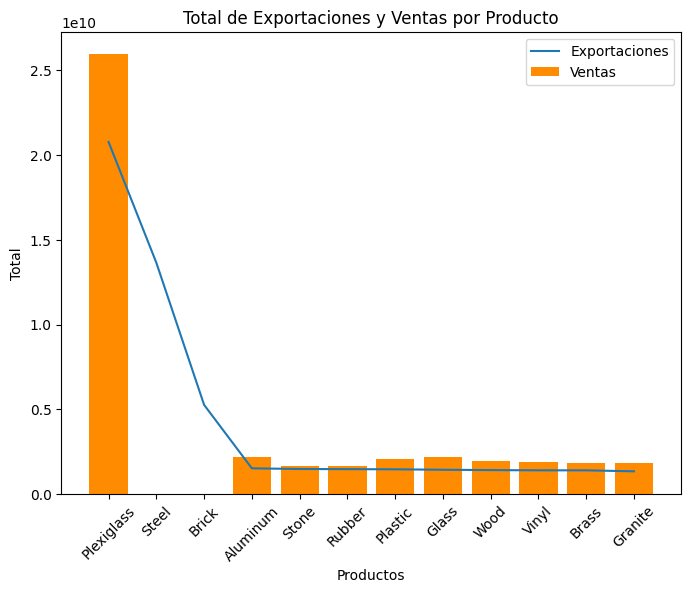

In [ ]:
fig, gra = plt.subplots(figsize=(8,6))
gra.bar(merged_totals.index, merged_totals['sales_total'], color='darkorange')
gra.plot(merged_totals.index, merged_totals['exports_total'])
gra.set_xlabel('Productos')
gra.set_ylabel('Total')
gra.set_title('Total de Exportaciones y Ventas por Producto')
gra.legend(['Exportaciones', 'Ventas'])
gra.set_xticks(range(len(merged_totals.index)))
gra.set_xticklabels(merged_totals.index, rotation=45)


En el gráfico se puede observar que hay una gran diferencia entre lo exportado de acero y ladrillos

###**Agregamos el ratio de los totales de las ventas y exportaciones**

In [ ]:
merged_totals['ratio_sales/exports'] = merged_totals['sales_total'] / merged_totals['exports_total']
merged_totals

,exports_total,sales_total,ratio_sales/exports
Products,,,
Plexiglass,"20,779,232,535.00","25,974,040,668.70",1.25
Steel,"13,652,930,026.00","58,457.97",0.00
Brick,"5,260,549,009.00","152,658.00",0.00
Aluminum,"1,513,169,630.00","2,163,832,570.85",1.43
Stone,"1,474,570,889.00","1,651,519,395.63",1.12
Rubber,"1,465,042,482.00","1,680,453,941.29",1.15
Plastic,"1,456,143,794.00","2,047,338,174.32",1.41
Glass,"1,429,786,765.00","2,173,275,882.75",1.52
Wood,"1,409,171,577.00","1,930,565,060.44",1.37


###**Para obtener un contexto de por qué sucede esto, exploramos los datos que están en location_profiles**
Este archivo posee los datos sobre las regiones y a que se dedica cada una.
En la columna de id, aparecen los distribuidores que operan en la región.

In [ ]:
location_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PYid        272 non-null    int64  
 1   id          11 non-null     float64
 2   location    264 non-null    object 
 3   department  271 non-null    object 
 4   activities  271 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.8+ KB


In [ ]:
location_profiles

,PYid,id,location,department,activities
0,71,NaN,Abaí,Caazapá,"food and beverage products manufacture, other ..."
1,224,NaN,Acahay,Paraguarí,"food and beverage products manufacture, other ..."
2,208,NaN,Alberdi,Ñeembucú,"food and beverage products manufacture, other ..."
3,168,NaN,Alto Verá,Itapúa,"food and beverage products manufacture, other ..."
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
...,...,...,...,...,...
267,152,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
268,157,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
269,191,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
270,193,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."


###Obtenemos las regiones en las que operan nuestros distribuidores


In [ ]:
location_profiles = location_profiles[location_profiles['id'].notna()]
location_profiles

,PYid,id,location,department,activities
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523.00,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519.00,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286.00,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112.00,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169.00,San Miguel,Misiones,craft production
200,9,402.00,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102.00,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387.00,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42.00,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


In [ ]:
location_profiles = location_profiles.dropna()
location_profiles

,PYid,id,location,department,activities
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523.00,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519.00,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286.00,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112.00,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169.00,San Miguel,Misiones,craft production
200,9,402.00,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102.00,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387.00,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42.00,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


Observamos que los datos obtenidos y la fuente de datos, indican que la mayoría de los distribuidores operan en regiones que no se dedican principalmente a la construcción o actividades que requieran los productos que se exportan.

<hr style="margin-bottom: 40px;">

#**Conclusión**

<img src="https://drive.google.com/uc?id=1Qf2WS_hUUDC02isTIcn5CwQMXtr3mYKH">

# **Grupo 227**
**Integrantes:**

* Belén Navarro
* Federico Manuel Maximovicz
* Federico Maximiliano Rossendy
* Ludmila Sánchez
* Luisina Loste



<img src="https://drive.google.com/uc?id=1g8LYJGAetHiJVwl8IbLjWcMlYAFvmh4q" width="200">
